# Datasets & DataLoaders

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


# root 디렉토리에 data 폴더가 없으면 생성하고, FashionMNIST 데이터를 다운로드
training_data = datasets.FashionMNIST(
    root="data",                            # 저장 경로
    train=True,                             # True면 훈련 데이터, False면 테스트 데이터
    download=True,                          # 데이터가 없으면 다운로드
    transform=ToTensor()                    # 데이터를 텐서로 변환
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


print(len(training_data), len(test_data))

100.0%
100.0%
100.0%
100.0%

60000 10000


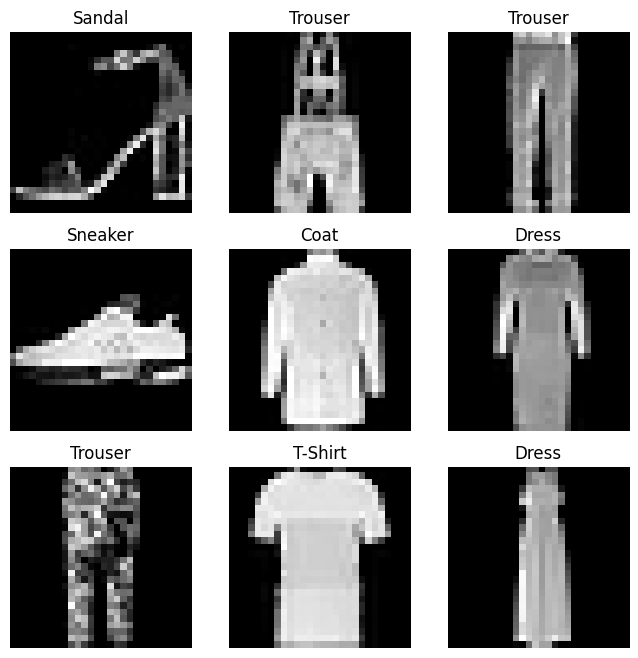

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8)) # 크기가 8x8인 빈 도화지 생성
cols, rows = 3, 3 # 3x3 격자
for i in range(1, cols * rows + 1): # 1,cols*rows는 1~8까지니까 9까지 포함하도록 +1
    sample_idx = torch.randint(len(training_data), size=(1,)).item() # 
        # 0~len(training_data)-1 사이의 정수 1개를 무작위로 뽑음
        # .item()을 붙여서 텐서가 아닌 파이썬 숫자로 변환
    img, label = training_data[sample_idx] 
        # 무작위로 뽑은 인덱스에 해당하는 (이미지, 레이블) 쌍
        # img: [1, 28, 28] 크기의 텐서, label: 0~9 사이의 정수
        # FashionMNIST 데이터셋은 한. 샘플이 (image, label) 쌍으로 구성되어 있음
    figure.add_subplot(rows, cols, i)
        # 3행 3열 격자의 i번째 위치에 서브플롯 추가
        # i는 1부터 9까지 (왼쪽 위 -> 오른쪽)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
import os
import pandas as pd
from torchvision.io import decode_image

class CustomImageDataset(Dataset): 
    # torch.utils.data.Dataset을 상속받아 커스텀 데이터셋 클래스 정의
    # torch.utils.data.Dataset을 상속하면 “이 클래스는 데이터셋처럼 동작한다”는 약속(인터페이스)을 따르게 돼
    # 내 데이터 포맷을 PyTorch 학습 파이프라인에 맞게 표준화해주는 래퍼(wrapper)
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self): # 데이터셋의 샘플 개수 반환
        return len(self.img_labels)

    def __getitem__(self, idx): # 인덱스 idx에 해당하는 샘플 반환
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
from torch.utils.data import DataLoader

# 모델 학습에 사용할 DataLoader 생성
# 과적합을 막기 위해 훈련 데이터는 셔플링
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


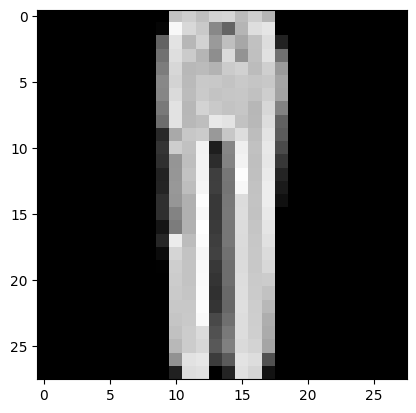

Label: 1


In [21]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0] .squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")